<a href="https://colab.research.google.com/github/zhijunm/Text_Mining/blob/master/Text_Clustering_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

In [0]:
doc1 = 'go monster go'
doc2 = 'go karting'
doc3 = 'karting monster'
doc4 = 'monster monster'

In [0]:
vectorizer = TfidfVectorizer()

In [0]:
vectors = vectorizer.fit_transform([doc1, doc2,doc3,doc4])

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters


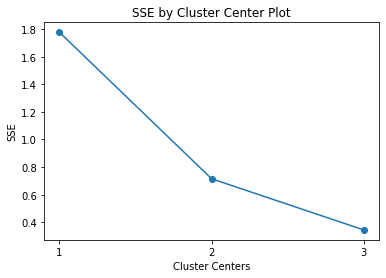

In [5]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(vectors, 3)

In [0]:
feature_names = vectorizer.get_feature_names()

In [0]:
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [8]:
print(df)

         go   karting   monster
0  0.926937  0.000000  0.375218
1  0.707107  0.707107  0.000000
2  0.000000  0.777221  0.629228
3  0.000000  0.000000  1.000000


In [0]:
# Applying K-means clustering with 2 clusters
km = KMeans(n_clusters = 2, max_iter=10, n_init=1)

In [10]:
km.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :2]:  # change 2 to n term you want to see
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 monster
 karting
Cluster 1:
 go
 karting
